In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN,Dense,Activation

In [2]:
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(path="imdb.npz",num_words=None,skip_top=0,maxlen=None,start_char=1,seed=13,oov_char=2,index_from=3)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
print("Type: ", type(X_train))
print("Type: ", type(Y_train))

Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>


In [4]:
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)

X train shape:  (25000,)
Y train shape:  (25000,)


In [5]:
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [6]:
unique,counts = np.unique(Y_train,return_counts=True)
print("Y train distribution: ", dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [7]:
unique,counts = np.unique(Y_test,return_counts=True)
print("Y test distribution: ", dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


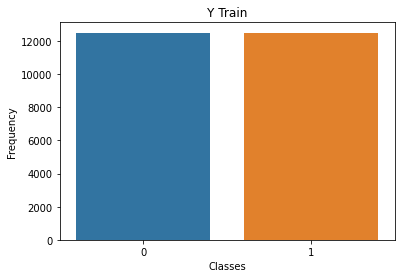

In [8]:
plt.figure();
sns.countplot(Y_train);
plt.xlabel("Classes");
plt.ylabel("Frequency");
plt.title("Y Train");

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


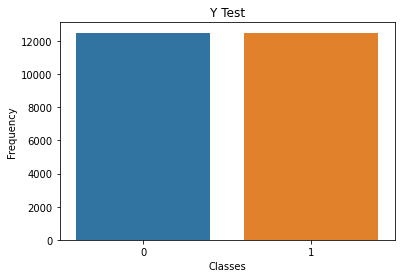

In [9]:
plt.figure();
sns.countplot(Y_test);
plt.xlabel("Classes");
plt.ylabel("Frequency");
plt.title("Y Test");

In [10]:
print(X_train[0])

[1, 608, 13, 6467, 14, 22, 13, 80, 1109, 14, 20, 584, 18, 231, 72, 141, 6, 783, 254, 189, 7060, 13, 100, 115, 106, 14, 20, 584, 207, 82, 557, 111, 111, 537, 7, 4, 962, 12, 69, 11, 45, 204, 766, 33, 4, 8334, 23, 94, 797, 1048, 991, 527, 1987, 538, 2629, 4, 4518, 125, 72, 449, 8295, 68, 3385, 2500, 93, 14, 1190, 22, 13, 119, 12, 13, 197, 4, 226, 22, 16, 542, 5, 221, 14, 20, 9, 38, 629, 14, 9, 4, 6128, 20, 13, 28, 126, 110, 11, 61, 113, 24, 15, 51, 571, 11, 4, 22, 5, 4, 326, 7, 4, 22, 26, 24, 629, 195, 21, 51, 210, 188, 72, 16, 21849, 2726, 116, 118, 189, 22, 126, 164, 70, 126, 30, 14, 629, 174, 2195, 829, 33, 94, 61124]


In [11]:
review_len_train = []
review_len_test = []
for i,j in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

In [12]:
print("min: ", min(review_len_train), "max: ", max(review_len_train))

min:  11 max:  2494


In [13]:
print("min: ", min(review_len_test), "max: ", max(review_len_test))

min:  7 max:  2315


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


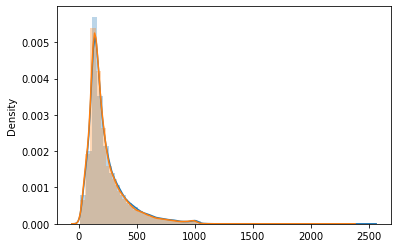

In [14]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});

In [15]:
print("Train mean: ",np.mean(review_len_train))
print("Train median: ",np.median(review_len_train))
print("Train mode: ",stats.mode(review_len_train))

Train mean:  238.71364
Train median:  178.0
Train mode:  ModeResult(mode=array([132]), count=array([196]))


In [16]:
word_index = imdb.get_word_index()
print(type(word_index))

1641221/1641221 [==============================] - 0s 0us/step
<class 'dict'>


In [17]:
print("length of word_index: ",len(word_index))

length of word_index:  88584


In [18]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [19]:
def whatItSay(index=24):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay()

! this movie was extremely funny i would like to own this for my vintage collection of 1970s movie must see again list i know this cast of characters they are people that i have met over the years and that prompt me to search out this comedy unfortunately this was never put to dvd or vhs redd foxx always a clown of comedy pearl baily a great match as his wife witty and sassy norman a son with a secret not sure if he will have a future if it is out dennis dugan crazy funny man miss dobson hooker with a heart and little conscience love lust strange family ties this movie qualifies for a come back encore performance situation comedy with a mix of events as this could and should find its way as a remake i do think finding cast would be extremely difficult maybe impossible except jerry seinfeld playing dennis dugan role this earmarks a couple of seinfeld episodes that also brought me back to norman is that you keeping them in the closest was surely impossible as impossible to reform pretend

In [20]:
decoded_review = whatItSay(5)

! quite possibly how francis veber one of the best comedy directors in the world at least when sticking to his native france managed to turn in a film so completely unwatchable is beyond the reason of mere mortal man to discern it's not just that the characters are so unlikeable or that the film is so utterly devoid of even the lowest form of wit it's genuinely physically painful to watch such an endless parade of inept writing acting and film making that you cannot believe this is the work of experienced and talented filmmakers for once the near eternity spent in the cutting room and on the shelf before its blink and you'll miss it theatrical release tells the whole story what were they thinking
0


In [21]:
num_words = 15000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [22]:
maxlen=130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [23]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 130)


In [24]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [25]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [26]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


In [27]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0]))) # num_words=15000
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = rnn.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 5,batch_size=128,verbose = 1)

Epoch 1/5


2022-07-24 20:40:13.469092: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


196/196 [==============================] - 4s 16ms/step - loss: 0.6437 - accuracy: 0.6276 - val_loss: 0.6444 - val_accuracy: 0.6982
Epoch 2/5
196/196 [==============================] - 3s 17ms/step - loss: 0.4715 - accuracy: 0.8261 - val_loss: 0.5532 - val_accuracy: 0.7034
Epoch 3/5
196/196 [==============================] - 3s 16ms/step - loss: 0.3150 - accuracy: 0.8738 - val_loss: 0.3407 - val_accuracy: 0.8589
Epoch 4/5
196/196 [==============================] - 3s 15ms/step - loss: 0.2422 - accuracy: 0.9043 - val_loss: 0.3647 - val_accuracy: 0.8461
Epoch 5/5
196/196 [==============================] - 3s 15ms/step - loss: 0.2031 - accuracy: 0.9204 - val_loss: 0.6313 - val_accuracy: 0.7888


In [29]:
score = rnn.evaluate(X_test,Y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6313 - accuracy: 0.7888


In [30]:
print("accuracy:", score[1]*100)

accuracy: 78.87600064277649


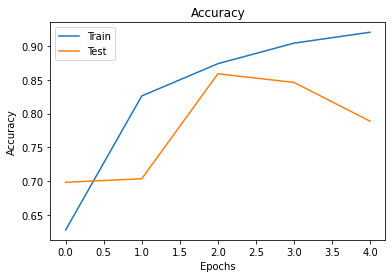

In [31]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

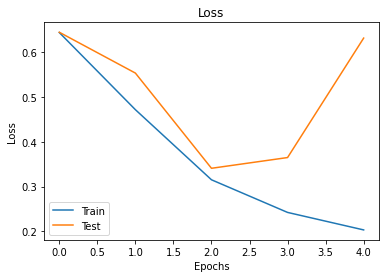

In [32]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();